In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [54]:
quantization_table = [[16, 11, 10, 16, 24, 40, 51, 61],
                [12, 12, 14, 19, 26, 58, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [68, 56, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]]



# Forward DCT (8 × 8）
# The image need to be divided into 8×8 blocks firstly, and then transform each image subblock into DCT domain.
# For each image subblock in DCT domain, the coefficient in the location (0, 0) is the DC coefficient, others are AC coefficients.

# Referred from Matlab 2-D DCT page
# https://in.mathworks.com/help/images/ref/dct2.html

def dct(image):
    image_data = image.astype(float)
    m, n = image_data.shape
    image_dct = np.zeros(image.shape)
    x_division = int(m/8)
    y_division = int(n/8)
    print ('m = ', m)
    print ('n = ', n)
    print (x_division)
    print (y_division)
    
    lis_dct = []
    x = 0
    F = 0
    lis_F = []
    TF = 0.1
    lis_selected = []
    
    T = 0.2
    TL = 0
    TH = 0
    
    pointer = 0
    
    avg = 0
    
#     with open("Data.txt") as f:
#         while True:
#             c = f.read(1)
#             if not c:
#                 print ("End of file")
#                 break
#             print ("Read a character:", c)
#             print (' '.join(format(ord(x), 'b') for x in c))

    for i in range(0, x_division):
        for j in range(0, y_division):
            x_s = i * 8
            x_e = (i+1) * 8
            y_s = j * 8
            y_e = (j+1) * 8
            image_dct[x_s:x_e, y_s:y_e] = cv2.dct(image_data[x_s:x_e,y_s:y_e]) / quantization_table
            lis_dct = cv2.dct(image_data[x_s:x_e,y_s:y_e]) / quantization_table
            y = 0
            sum_coeff = 0
            avg = 0
            for l in lis_dct:
                for k in l:
                    if y == 0:
                        y += 1
                        continue
                    else:
                        y += 1
                        sum_coeff += (k * k)
                        avg += k
#             print ('sum_coeff = ', sum_coeff)
            F = sum_coeff/64
            avg /= 64
            # Indexes of selected blocks inserted in a list, useful while traversing later
            if F < TF:
                lis_selected.append((i, j))
                
                for l in lis_dct:
                    for k in l:
#                         x = k
                
                        if T >= 0:
        #                     print ("IN1")
        #                     print (abs(x - T))
                            if abs(k - T) <= 0.1:
                                current = 0
                                print ("IN2")
                                with open("Data.txt") as f:
                                    while True:
                                        c = f.read(1)
                                        if not c:
                                            print ("End of file")
        #                                     break
                                            return image_dct
                                        if current < pointer:
                                            current += 1
                                            continue
                                        elif current >= pointer:
                                            print ("Read a character:", int(c))
        #                                     print (' '.join(format(ord(x), 'b') for x in c))
                                            current += 1
                                            pointer = current
                                            print ("Old K: ", k)
                                            k += int(c)
                                            print ("New K: ", k)
                                            break

                            elif (k - T) > 0.1:
                                k += 1
#                                 print (k)
                    
                        else:
                            print ("OUT1")
                            if abs(k - T) <= 0.1:
                                current = 0
                                print ("OUT2")
                                with open("Data.txt") as f:
                                    while True:
                                        c = f.read(1)
                                        if not c:
                                            print ("End of file")
        #                                     break
                                            return image_dct
                                        if current < pointer:
                                            current += 1
                                            continue
                                        elif current >= pointer:
                                            print ("Read a character:", int(c))
        #                                     print (' '.join(format(ord(x), 'b') for x in c))
                                            current += 1
                                            pointer = current
                                            k -= int(c)
                                            break

                            elif (k - T) < 0.1:
                                k -= 1
            
            lis_F.append(F)
#             if x < 5:
#                 print (F)
#                 print (lis_dct)
#                 print (avg)
#                 x += 1
#                 print ('y = ', y)

#     print ("Avg is ", sum(lis_F) / len(lis_F))
#     print (lis_F)
    print ("Length of lis_F = ", len(lis_F))
    print ("Length of lis_selected = ", len(lis_selected))
#     print (lis_selected)
    return image_dct




m =  2100
n =  1179
262
147
IN2
Read a character: 1
Old K:  0.248744231037
New K:  1.24874423104
IN2
Read a character: 0
Old K:  0.283798422313
New K:  0.283798422313
IN2
Read a character: 0
Old K:  0.117749352183
New K:  0.117749352183
IN2
Read a character: 1
Old K:  0.107480512251
New K:  1.10748051225
IN2
Read a character: 1
Old K:  0.297544895333
New K:  1.29754489533
IN2
Read a character: 0
Old K:  0.218520021472
New K:  0.218520021472
IN2
Read a character: 0
Old K:  0.157714072858
New K:  0.157714072858
IN2
Read a character: 1
Old K:  0.227129392761
New K:  1.22712939276
IN2
Read a character: 1
Old K:  0.137525377455
New K:  1.13752537745
IN2
End of file


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

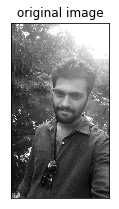

In [55]:
image = cv2.imread('github.jpeg', 0)

# DCT
image_dct = dct(image)

plt.subplot(131)
plt.imshow(image, 'gray')
plt.title('original image')
plt.xticks([]), plt.yticks([])

# plt.subplot(132)
# plt.imshow(image_dct, 'gray')
# plt.title('dct')
# plt.xticks([]), plt.yticks([])

In [4]:
# hist() function
# https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_image_histogram_calcHist.php

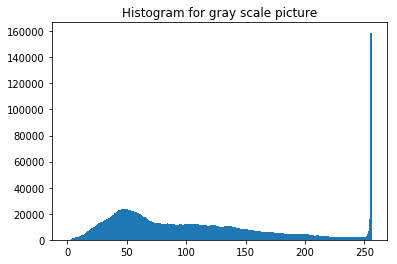

In [5]:
# hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist,bins = np.histogram(image,256,[0,256])
a = plt.hist(image.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

In [6]:
hist = list(filter(lambda a: a != 0, hist))
print(len(hist))

256
